In [ ]:
# Importação das Bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE


ModuleNotFoundError: No module named 'imblearn'

In [3]:
# Caminho do dataset tratado
file_path = "../dataset/raw/ObesityDataSet_cleaned.csv"

# Carregar os dados
df = pd.read_csv(file_path)

# Verificar se o dataset foi carregado corretamente
print("✅ Dataset carregado com sucesso!")
print(df.head())


✅ Dataset carregado com sucesso!
    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  29.0    Male    1.62    53.0   Sometimes  yes   2.0  3.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes             Automobile   

     

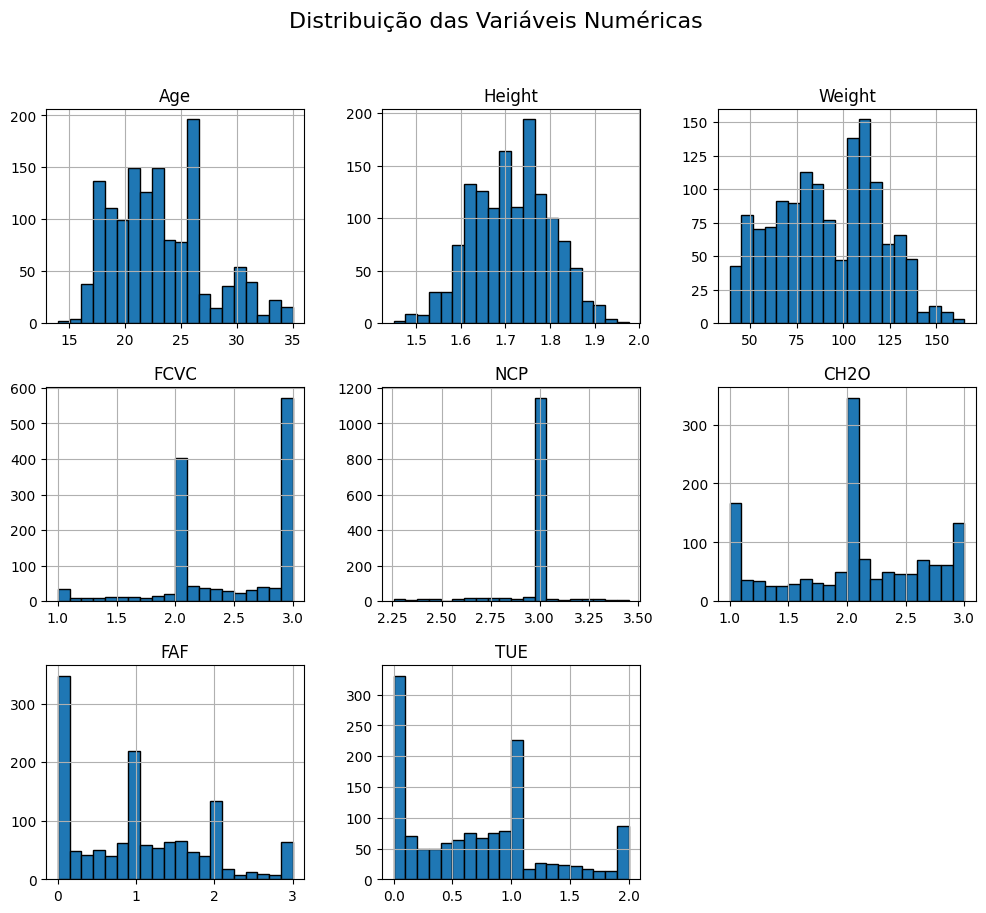

In [4]:
# Para escolher o melhor método de normalização, devemos verificar se as distribuições das variáveis seguem uma distribuição normal ou não.

import seaborn as sns
import matplotlib.pyplot as plt

# Plotar histogramas das variáveis numéricas
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.show()


In [5]:
# Normalização 
# Como temos variáveis com diferentes distribuições e outliers, a melhor abordagem é usar MinMaxScaler, pois ele mantém a distribuição original dos dados e reduz a influência de outliers.

# Selecionar colunas numéricas
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Criar e aplicar o MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("✅ Normalização concluída!")
print(df.head())



✅ Normalização concluída!
        Age  Gender    Height    Weight        CALC FAVC  FCVC       NCP  SCC  \
0  0.333333  Female  0.323401  0.198323          no   no   0.5  0.621729   no   
1  0.333333  Female  0.133165  0.134859   Sometimes   no   1.0  0.621729  yes   
2  0.428571    Male  0.665826  0.301450  Frequently   no   0.5  0.621729   no   
3  0.619048    Male  0.665826  0.380779  Frequently   no   1.0  0.621729   no   
4  0.714286    Male  0.323401  0.111061   Sometimes  yes   0.5  0.621729   no   

  SMOKE  CH2O family_history_with_overweight       FAF  TUE       CAEC  \
0    no   0.5                            yes  0.000000  0.5  Sometimes   
1   yes   1.0                            yes  1.000000  0.0  Sometimes   
2    no   0.5                            yes  0.666667  0.5  Sometimes   
3    no   0.5                             no  0.666667  0.0  Sometimes   
4    no   0.5                             no  0.000000  0.0  Sometimes   

                  MTRANS          NObeyesd

NObeyesdad
Obesity_Type_III       323
Obesity_Type_II        216
Normal_Weight          196
Obesity_Type_I         194
Overweight_Level_II    170
Overweight_Level_I     148
Insufficient_Weight    141
Name: count, dtype: int64


C:\Users\Matheus\AppData\Local\Temp\ipykernel_13412\576085398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["NObeyesdad"], order=df["NObeyesdad"].value_counts().index, palette="pastel")


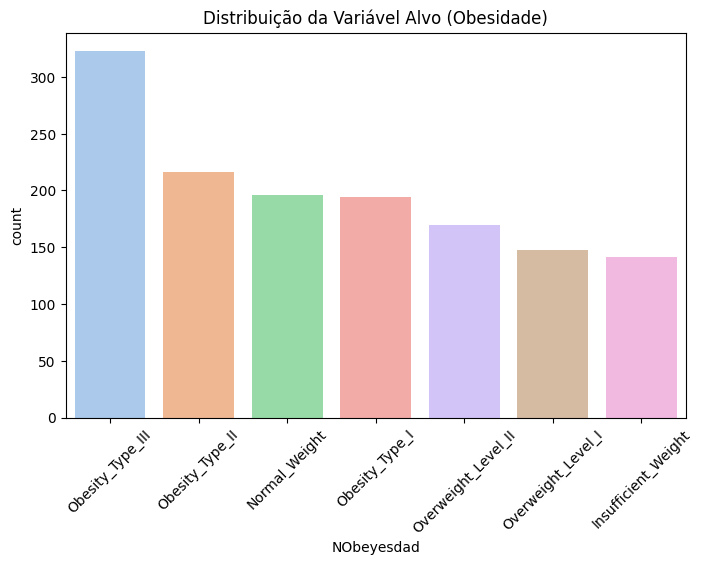

In [6]:
# Verificar Balanceamento da Variável Alvo
print(df["NObeyesdad"].value_counts())

# Plotar a distribuição
plt.figure(figsize=(8, 5))
sns.countplot(x=df["NObeyesdad"], order=df["NObeyesdad"].value_counts().index, palette="pastel")
plt.xticks(rotation=45)
plt.title("Distribuição da Variável Alvo (Obesidade)")
plt.show()


In [12]:
# Carregar e conferir o dataset limpo
import pandas as pd

# Carregar dataset limpo
df = pd.read_csv("../dataset/raw/ObesityDataSet_cleaned.csv")

# Exibir primeiras linhas para conferência
print(df.head())


    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  29.0    Male    1.62    53.0   Sometimes  yes   2.0  3.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes             Automobile   

           NObeyesdad  
0       Normal

In [13]:
# Verificar colunas categóricas
categorical_cols = ["Gender", "CALC", "FAVC", "SCC", "SMOKE", 
                     "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Conferir novas colunas geradas
print(df_encoded.head())


    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Male  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0        False   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0        False   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0         True   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0         True   
4  29.0    1.62    53.0   2.0  3.0   2.0  0.0  0.0         True   

   CALC_Sometimes  ...  MTRANS_Bike  MTRANS_Motorbike  \
0           False  ...        False             False   
1            True  ...        False             False   
2           False  ...        False             False   
3           False  ...        False             False   
4            True  ...        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  NObeyesdad_Normal_Weight  \
0                          True           False                      True   
1                          True           False                      True   
2                      

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Identificar colunas numéricas
numerical_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]

# Aplicar Min-Max Scaling
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Conferir os dados normalizados
print(df_encoded.head())


        Age    Height    Weight  FCVC       NCP  CH2O       FAF  TUE  \
0  0.333333  0.323401  0.198323   0.5  0.621729   0.5  0.000000  0.5   
1  0.333333  0.133165  0.134859   1.0  0.621729   1.0  1.000000  0.0   
2  0.428571  0.665826  0.301450   0.5  0.621729   0.5  0.666667  0.5   
3  0.619048  0.665826  0.380779   1.0  0.621729   0.5  0.666667  0.0   
4  0.714286  0.323401  0.111061   0.5  0.621729   0.5  0.000000  0.0   

   Gender_Male  CALC_Sometimes  ...  MTRANS_Bike  MTRANS_Motorbike  \
0        False           False  ...        False             False   
1        False            True  ...        False             False   
2         True           False  ...        False             False   
3         True           False  ...        False             False   
4         True            True  ...        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  NObeyesdad_Normal_Weight  \
0                          True           False                      

In [ ]:

# Separar features e variável alvo
X = df_encoded.drop(columns=["NObeyesdad_Obesity_Type_III"])  # Substituir pela variável alvo correta
y = df_encoded["NObeyesdad_Obesity_Type_III"]  # Ajustar conforme a variável alvo original

# Aplicar SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Criar novo DataFrame balanceado
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                         pd.DataFrame(y_resampled, columns=["NObeyesdad_Obesity_Type_III"])], axis=1)

# Conferir distribuição da variável alvo após o balanceamento
print(df_balanced["NObeyesdad_Obesity_Type_III"].value_counts())


NObeyesdad_Obesity_Type_III
False    1065
True     1065
Name: count, dtype: int64
